This notebook is for grabbing the snapshots from the REST cache and checking the dihedral distribution (i.e. are we randomly grabbing only one rotamer)?

In [1]:
import math
from simtk import unit
import os
import tempfile
import pickle
import mdtraj as md
import numpy as np
from simtk.unit.quantity import Quantity
import logging

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
from simtk.openmm import app
from tqdm import tqdm
import argparse
import random
from simtk.openmm.app import Modeller


In [10]:
def get_dihedrals_from_hybrid(i, is_old, phase, name, length, outdir, htf, dihedral_indices_new, dihedral_indices_old):
    # Get topology 
    old_top = md.Topology.from_openmm(htf._topology_proposal.old_topology)
    new_top = md.Topology.from_openmm(htf._topology_proposal.new_topology)
    
    # Read hybrid positions
    with open(os.path.join(outdir, f"{i}_{phase}_{name}_{length}ns_snapshots.npy"), "rb") as f:
        hybrid_pos = np.load(f)
    
    # Get the old and new positions from the hybrid positions
    from tqdm import tqdm
    n_frames = hybrid_pos.shape[0]
    all_pos_old = np.zeros(shape=(n_frames, old_top.n_atoms, 3))
    all_pos_new = np.zeros(shape=(n_frames, new_top.n_atoms, 3))
    for j in tqdm(range(n_frames)):
        if is_old:
            all_pos_old[j] = htf.old_positions(hybrid_pos[j]*unit.nanometers)
        else:
            all_pos_new[j] = htf.new_positions(hybrid_pos[j]*unit.nanometers)

    # Compute dihedrals
    traj = md.Trajectory(np.array(all_pos_old), old_top)
    dihedrals_old = md.compute_dihedrals(traj, np.array([dihedral_indices_old]))
    
    traj = md.Trajectory(np.array(all_pos_new), new_top)
    dihedrals_new = md.compute_dihedrals(traj, np.array([dihedral_indices_new]))
    
    return dihedrals_new, dihedrals_old


def plot_dihedrals(dihedrals, outfile):
    # Plot histogram with error bars : https://stackoverflow.com/questions/35390276/how-to-add-error-bars-to-histogram-diagram-in-python
    entries, edges, _ = plt.hist(dihedrals)
    bin_centers = 0.5 * (edges[:-1] + edges[1:]) # calculate bin centers
    plt.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='r.') # draw errobars, use the sqrt error
    plt.xlim(-np.pi, np.pi)
    plt.show()
#     plt.savefig(outfile, dpi=300)
    plt.close()



# Check dihedrals of THR @ lambda = 0 for apo T42A REST cache

In [7]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/12/19/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))
name = 'THR'.lower()
length = 1


In [4]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [8]:
indices_old = [669, 670, 673, 674]
indices_new = [669, 670, 673, 676]
dihedrals_new, dihedrals_old = get_dihedrals_from_hybrid(i, True, phase, name, length, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:17<00:00,  5.71it/s]


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

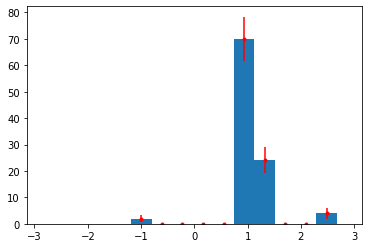

In [9]:
plot_dihedrals(dihedrals_old, os.path.join(outdir, f"correlated.png"))


# Check dihedrals of THR @ lambda = 1 for apo T42A REST cache

In [11]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/12/19/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))
name = 'ALA'.lower()
length = 1


In [12]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [13]:
indices_old = [669, 670, 673, 674]
indices_new = [669, 670, 673, 676]
dihedrals_new, dihedrals_old = get_dihedrals_from_hybrid(i, True, phase, name, length, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:17<00:00,  5.83it/s]


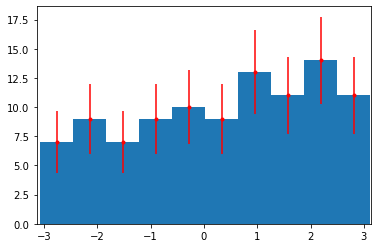

In [14]:
plot_dihedrals(dihedrals_old, os.path.join(outdir, f"correlated.png"))


# Check dihedrals of THR @ lambda = 0 for complex T42A REST cache

In [15]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/12/19/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))
name = 'THR'.lower()
length = 1


In [16]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [17]:
indices_old = [669, 670, 673, 674]
indices_new = [669, 670, 673, 676]
dihedrals_new, dihedrals_old = get_dihedrals_from_hybrid(i, True, phase, name, length, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:34<00:00,  2.94it/s]


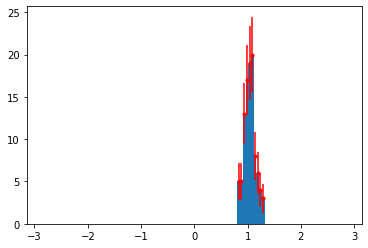

In [18]:
plot_dihedrals(dihedrals_old, os.path.join(outdir, f"correlated.png"))


# Check dihedrals of THR @ lambda = 1 for complex T42A REST cache

In [19]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/12/19/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))
name = 'ALA'.lower()
length = 1


In [20]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [21]:
indices_old = [669, 670, 673, 674]
indices_new = [669, 670, 673, 676]
dihedrals_new, dihedrals_old = get_dihedrals_from_hybrid(i, True, phase, name, length, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:33<00:00,  2.99it/s]


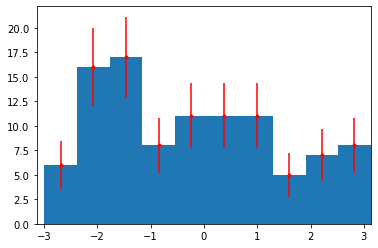

In [22]:
plot_dihedrals(dihedrals_old, os.path.join(outdir, f"correlated.png"))


# Check dihedrals of THR @ lambda = 0 for apo A42T REST cache

In [41]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/12/20/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))
name = 'ALA'.lower()
length = 1


In [42]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [43]:
indices_old = [669, 670, 673, 676]
indices_new = [669, 670, 673, 681]
dihedrals_new, dihedrals_old = get_dihedrals_from_hybrid(i, False, phase, name, length, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:17<00:00,  5.68it/s]


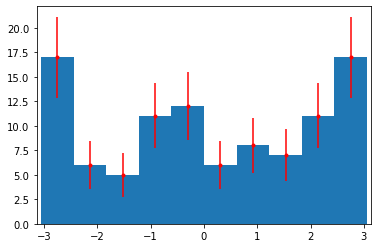

In [44]:
plot_dihedrals(dihedrals_new, os.path.join(outdir, f"correlated.png"))


# Check dihedrals of THR @ lambda = 1 for apo A42T REST cache

In [45]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/12/20/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))
name = 'THR'.lower()
length = 1


In [46]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [47]:
indices_old = [669, 670, 673, 676]
indices_new = [669, 670, 673, 681]
dihedrals_new, dihedrals_old = get_dihedrals_from_hybrid(i, False, phase, name, length, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:17<00:00,  5.74it/s]


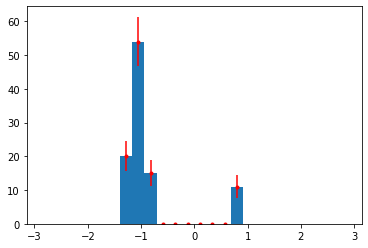

In [48]:
plot_dihedrals(dihedrals_new, os.path.join(outdir, f"correlated.png"))


# Check dihedrals of THR @ lambda = 0 for complex A42T REST cache

In [49]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/12/20/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))
name = 'ALA'.lower()
length = 1


In [50]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [51]:
indices_old = [669, 670, 673, 676]
indices_new = [669, 670, 673, 681]
dihedrals_new, dihedrals_old = get_dihedrals_from_hybrid(i, False, phase, name, length, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:35<00:00,  2.83it/s]


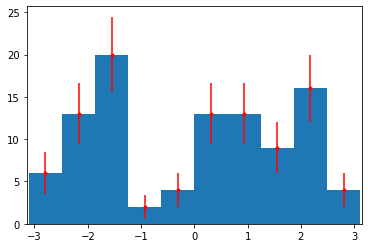

In [52]:
plot_dihedrals(dihedrals_new, os.path.join(outdir, f"correlated.png"))


# Check dihedrals of THR @ lambda = 1 for complex A42T REST cache

In [53]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/12/20/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))
name = 'THR'.lower()
length = 1


In [54]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [55]:
indices_old = [669, 670, 673, 676]
indices_new = [669, 670, 673, 681]
dihedrals_new, dihedrals_old = get_dihedrals_from_hybrid(i, False, phase, name, length, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:34<00:00,  2.91it/s]


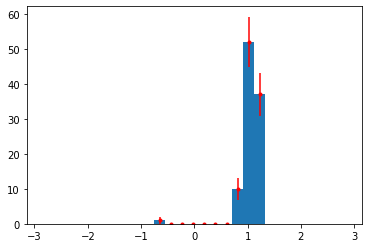

In [56]:
plot_dihedrals(dihedrals_new, os.path.join(outdir, f"correlated.png"))
